Columns: Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_level'],
      dtype='object')
n_estimators=10, Accuracy: 0.8277

Confusion Matrix (n_estimators=10):
[[10722   387]
 [ 2138  1406]]


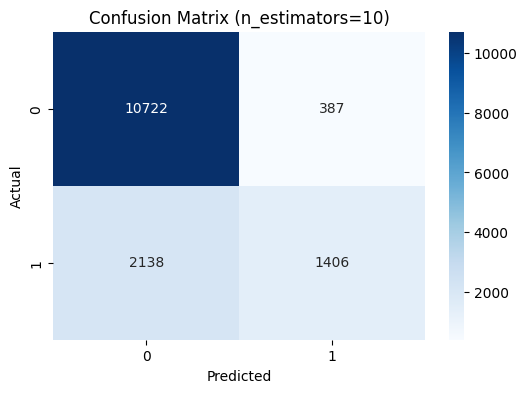


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89     11109
           1       0.78      0.40      0.53      3544

    accuracy                           0.83     14653
   macro avg       0.81      0.68      0.71     14653
weighted avg       0.82      0.83      0.81     14653

n_estimators=10, Accuracy: 0.8277
n_estimators=20, Accuracy: 0.8248
n_estimators=30, Accuracy: 0.8295
n_estimators=40, Accuracy: 0.8293
n_estimators=50, Accuracy: 0.8292
n_estimators=60, Accuracy: 0.8299
n_estimators=70, Accuracy: 0.8305
n_estimators=80, Accuracy: 0.8306
n_estimators=90, Accuracy: 0.8305
n_estimators=100, Accuracy: 0.8307
n_estimators=110, Accuracy: 0.8308
n_estimators=120, Accuracy: 0.8308
n_estimators=130, Accuracy: 0.8308
n_estimators=140, Accuracy: 0.8308
n_estimators=150, Accuracy: 0.8310
n_estimators=160, Accuracy: 0.8312
n_estimators=170, Accuracy: 0.8312
n_estimators=180, Accuracy: 0.8312
n_estimators=190, Accuracy: 

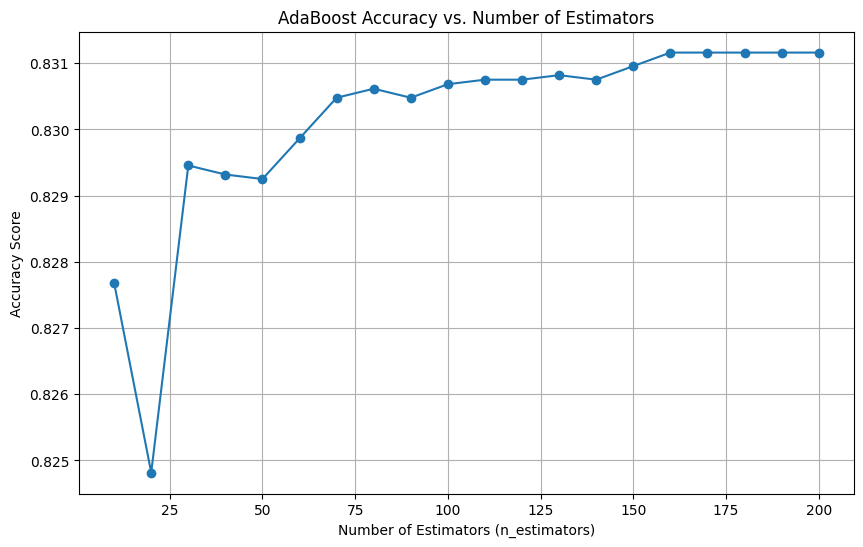

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/income.csv'
data = pd.read_csv(file_path)

# Inspect columns
print("Columns:", data.columns)

# Assume last column is target, others are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1️⃣ Build AdaBoost with n_estimators=10
ada_default = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_default.fit(X_train, y_train)
y_pred_default = ada_default.predict(X_test)
score_default = accuracy_score(y_test, y_pred_default)
print(f"n_estimators=10, Accuracy: {score_default:.4f}")

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred_default)
print("\nConfusion Matrix (n_estimators=10):")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (n_estimators=10)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Show classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_default))

# 2️⃣ Fine-tune number of estimators
best_score = 0
best_n = 0
scores = []
n_values = range(10, 201, 10)  # Try from 10 to 200 in steps of 10
for n in n_values:
    ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print(f"n_estimators={n}, Accuracy: {score:.4f}")
    if score > best_score:
        best_score = score
        best_n = n

print(f"\nBest accuracy {best_score:.4f} achieved with n_estimators={best_n}")

# Plot scores vs. number of estimators
plt.figure(figsize=(10,6))
plt.plot(n_values, scores, marker='o')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy Score')
plt.title('AdaBoost Accuracy vs. Number of Estimators')
plt.grid(True)
plt.show()
